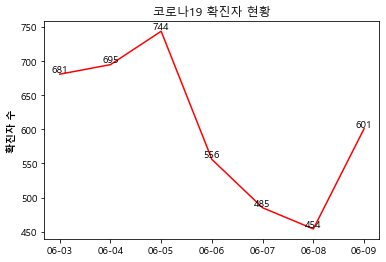

In [16]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import time as t
from datetime import datetime, timedelta
# API 서버에 GET으로 요청
res = requests.get("https://corona-api.xyz/api/korea")
# 요청한 데이터를 json 즉 dictionary로 변형
data = json.loads(res.text)
# 시간을 timestamp로 변환 (밀리세컨드)
timestamp = t.mktime(datetime.today().timetuple())
# 그래프에 날짜를 넣어주기 위해서 7일값을 list로 만듬
days = [
    datetime.fromtimestamp(timestamp - 604800).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 518400).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 432000).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 345600).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 259200).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 172800).strftime("%m-%d"),
    datetime.fromtimestamp(timestamp - 86400).strftime("%m-%d")
]
# API 서버에서 받은 데이터에서 week라는 값을 불러옴
datas = data["week"],
# 해당 데이터가 문자열이므로, map이라는 함수를 이용하여 해당 데이터들을 정수로 변경
string_datas = map(int, datas[0])
# 정소로 변한 데이터 요소들을 list로 다시 만듬
int_datas = list(string_datas)
# 폰트 지정 
plt.rc('font', family ='Malgun Gothic')
# 꺾은선 그래프 만들기 
plt.plot(days, int_datas, color = "red")
# 제목
plt.title("코로나19 확진자 현황")
# Y축 라벨 이름 지정 
plt.ylabel("확진자 수", fontweight="bold")
# 꺾은선 그래프에 값을 표시 
for x,y in zip(days, int_datas):
    plt.annotate(y, # 표시할 텍스트 위치
                 (x,y), # x,y 값 구하기
                textcoords="offset points", # 포지션 위치
                 xytext=(0,2), # x,y 거리 간격 추가
                ha='center') # 배열의 위치를 중앙으로 지정
# 해당 파일명으로 이미지 반환
plt.savefig('./images/COVID-19_korea.png', dpi = 400)